In [ ]:
pip install ffmpeg-python

In [1]:
import ffmpeg
import os

video_file_path = "C:/Users/Srinu's Laptop/Videos/WhatsApp Video 2024-08-04 at 19.06.19_40c1fba3.mp4"

def is_ffmpeg_available():
    try:
        result = os.system('ffmpeg -version')
        if result != 0:
            raise EnvironmentError("ffmpeg is not installed or not in the system PATH.")
    except Exception as error:
        print(error)
        return False
    return True

def display_frame_info(video_path):
    if is_ffmpeg_available():
        try:
            video_data = ffmpeg.probe(video_path)
            video_stream_info = next(s for s in video_data['streams'] if s['codec_type'] == 'video')

            print("Video Frame Information:")
            print(f"Duration: {video_stream_info['duration']} seconds")
            print(f"Frame Count: {video_stream_info['nb_frames']}")
            print(f"Video Codec: {video_stream_info['codec_name']}")
            print(f"Resolution: {video_stream_info['width']}x{video_stream_info['height']}")
        except ffmpeg.Error as error:
            print("Error while probing the video:", error)
    else:
        print("ffmpeg is not available. Please install it and ensure it's in the system PATH.")

display_frame_info(video_file_path)


Video Frame Information:
Duration: 30.758000 seconds
Frame Count: 742
Video Codec: h264
Resolution: 848x544


In [2]:
import ffmpeg
import json
import subprocess

video_file_path = "C:/Users/Srinu's Laptop/Videos/WhatsApp Video 2024-08-04 at 19.06.19_40c1fba3.mp4"

def extract_frame_details(path_to_video):
    try:
        ffprobe_command = [
            'ffprobe',
            '-v', 'error',
            '-select_streams', 'v:0',
            '-show_entries', 'frame=pict_type',
            '-of', 'json',
            path_to_video
        ]
        ffprobe_result = subprocess.run(ffprobe_command, capture_output=True, text=True, check=True)
        video_frames = json.loads(ffprobe_result.stdout)['frames']

        frame_type_counts = {'I': 0, 'P': 0, 'B': 0}

        for frame in video_frames:
            if 'pict_type' in frame:
                frame_type_counts[frame['pict_type']] += 1

        
        total_frame_count = sum(frame_type_counts.values())
        frame_type_percentages = {ftype: (count / total_frame_count) * 100 for ftype, count in frame_type_counts.items()}

        print("Frame Type Counts:", frame_type_counts)
        print("Frame Type Percentages:", frame_type_percentages)
    except subprocess.CalledProcessError as error:
        print("Error occurred during frame extraction:", error.stderr)
    except Exception as error:
        print("Unexpected error:", str(error))

extract_frame_details(video_file_path)


Frame Type Counts: {'I': 3, 'P': 739, 'B': 0}
Frame Type Percentages: {'I': 0.40431266846361186, 'P': 99.59568733153638, 'B': 0.0}


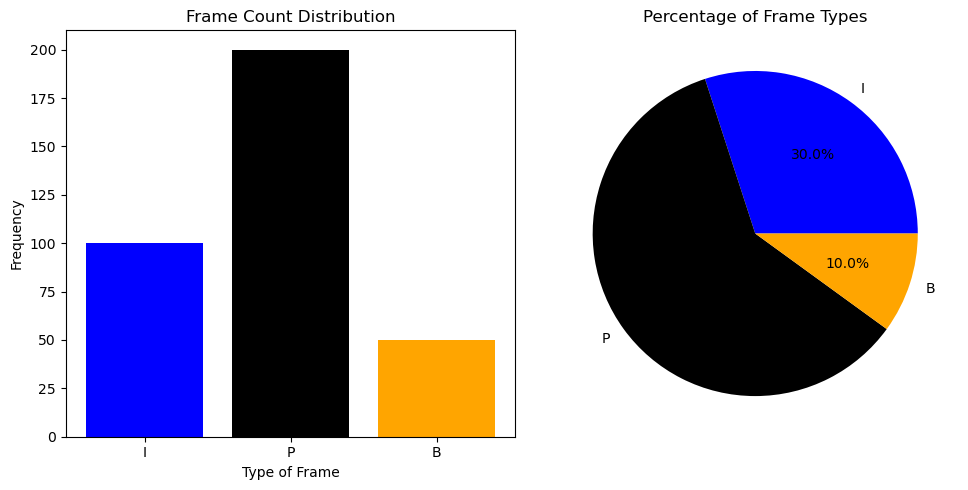

In [3]:
import matplotlib.pyplot as plt

type_counts = {'I': 100, 'P': 200, 'B': 50}
type_percentages = {'I': 30, 'P': 60, 'B': 10}

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(type_counts.keys(), type_counts.values(), color=['blue', 'black', 'orange'])
plt.title('Frame Count Distribution')
plt.xlabel('Type of Frame')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.pie(type_percentages.values(), labels=type_percentages.keys(), autopct='%1.1f%%', colors=['blue', 'black', 'orange'])
plt.title('Percentage of Frame Types')

plt.tight_layout()
plt.show()


In [4]:
import os
import ffmpeg

video_path = "C:/Users/Srinu's Laptop/Videos/WhatsApp Video 2024-08-04 at 19.06.19_40c1fba3.mp4"

output_dir = 'extracted_frames'

os.makedirs(output_dir, exist_ok=True)

try:
    ffmpeg.input(video_path).output(f'{output_dir}/frame_%04d_I.png', vf=r'select=eq(pict_type\,I)').run()
    ffmpeg.input(video_path).output(f'{output_dir}/frame_%04d_P.png', vf=r'select=eq(pict_type\,P)').run()
    ffmpeg.input(video_path).output(f'{output_dir}/frame_%04d_B.png', vf=r'select=eq(pict_type\,B)').run()
except ffmpeg.Error as e:
    print("An error occurred while extracting frames:", e.stderr.decode('utf-8'))



In [17]:

from PIL import Image
import glob


def display_frames(frame_type):
    frame_files = glob.glob(f'{output_dir}/frame_*_{frame_type}.png')
    for frame_file in frame_files[:5]:  
        img = Image.open(frame_file)
        img.show()

display_frames('I')
display_frames('P')
display_frames('B')

In [9]:
import os
def calculate_frame_sizes(frame_type):
    frame_files = glob.glob(f'{output_dir}/frame_*_{frame_type}.png')
    sizes = [os.path.getsize(frame_file) for frame_file in frame_files]
    return sizes

i_frame_sizes = calculate_frame_sizes('I')
p_frame_sizes = calculate_frame_sizes('P')
b_frame_sizes = calculate_frame_sizes('B')

average_sizes = {
    'I': sum(i_frame_sizes) / len(i_frame_sizes) if i_frame_sizes else 0,
    'P': sum(p_frame_sizes) / len(p_frame_sizes) if p_frame_sizes else 0,
    'B': sum(b_frame_sizes) / len(b_frame_sizes) if b_frame_sizes else 0
}

print("Average Frame Sizes (in bytes):", average_sizes)


Average Frame Sizes (in bytes): {'I': 771095.7737306843, 'P': 736507.415775401, 'B': 0}


In [10]:
frame_compression_roles = {
    'Intra': 'Intra frames are standalone frames that contain all the image data. They are essential for random access and error recovery.',
    'Predicted': 'Predicted frames store only the changes from the preceding frames, reducing size. They rely on Intra or other Predicted frames to be fully reconstructed.',
    'Bidirectional': 'Bidirectional frames use data from both preceding and following frames for maximum compression efficiency, resulting in the smallest frame size.'
}

print("Roles in Video Compression:")
for frame_kind, role_description in frame_compression_roles.items():
    print(f"{frame_kind} frames: {role_description}")


Roles in Video Compression:
Intra frames: Intra frames are standalone frames that contain all the image data. They are essential for random access and error recovery.
Predicted frames: Predicted frames store only the changes from the preceding frames, reducing size. They rely on Intra or other Predicted frames to be fully reconstructed.
Bidirectional frames: Bidirectional frames use data from both preceding and following frames for maximum compression efficiency, resulting in the smallest frame size.


In [13]:
import os
import ffmpeg

video_file ="C:/Users/Srinu's Laptop/Videos/WhatsApp Video 2024-08-04 at 19.06.19_40c1fba3.mp4"
i_frames_folder =  r"C:/Users/Srinu's Laptop/OneDrive - vit.ac.in/Desktop/viedo"

os.makedirs(i_frames_folder, exist_ok=True)

try:
    ffmpeg.input(video_file).output(f'{i_frames_folder}/i_frame_%04d.png', vf='select=eq(pict_type\\,I)').run()
except ffmpeg.Error as error:
    print("An error occurred while extracting I-frames:", error.stderr.decode('utf-8'))


In [16]:
output_video_path = "C:/Users/Srinu's Laptop/OneDrive - vit.ac.in/Desktop/reconstructed_video/WhatsApp Video 2024-08-04 at 19.06.19_40c1fba3.mp4"

try:
    ffmpeg.input(f'{i_frames_folder}/frame_%04d_I.png', framerate=1).output(output_video_path, vcodec='libx264', pix_fmt='yuv420p').run()
    print(f"Reconstructed video saved at {output_video_path}")
except ffmpeg.Error as e:
    print("An error occurred while reconstructing the video:", e.stderr.decode('utf-8'))


Reconstructed video saved at C:/Users/Srinu's Laptop/OneDrive - vit.ac.in/Desktop/reconstructed_video/WhatsApp Video 2024-08-04 at 19.06.19_40c1fba3.mp4
